In [1]:
import json 

from style import *

metric2title = {
    "brier_score": "Brier",
    "ECE": "ECE",
    "width_mean": "Mean set size",
    "post_train_log_likelihood": "Log Lik.",
    "post_log_marginal_likelihood": "Log Marg. Lik.",
    "predictive_ll": "NLL"
}


target2title = {
    "mu": r"$\mu$",
    "alpha": r"$\alpha$",
    "homo": r"$\varepsilon_{HOMO}$",
    "lumo": r"$\varepsilon_{LUMO}$",
    "Cv": r"$C_{\nu}$"
}

## Plot grid search results


In [2]:
with open('../../results/qm9/frequentist/invariant.json') as f:
    invariant = json.load(f)

with open('../../results/qm9/frequentist/equivariant.json') as f:
    equivariant = json.load(f)

with open('../../results/qm9/frequentist/plain.json') as f:
    plain = json.load(f)

with open('../../results/qm9/frequentist/augment.json') as f:
    augment = json.load(f)



/tmp/ipykernel_242785/1461904665.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[i].scatter(metric, width, c=colors[c], s=scatter_size, label=model_name)


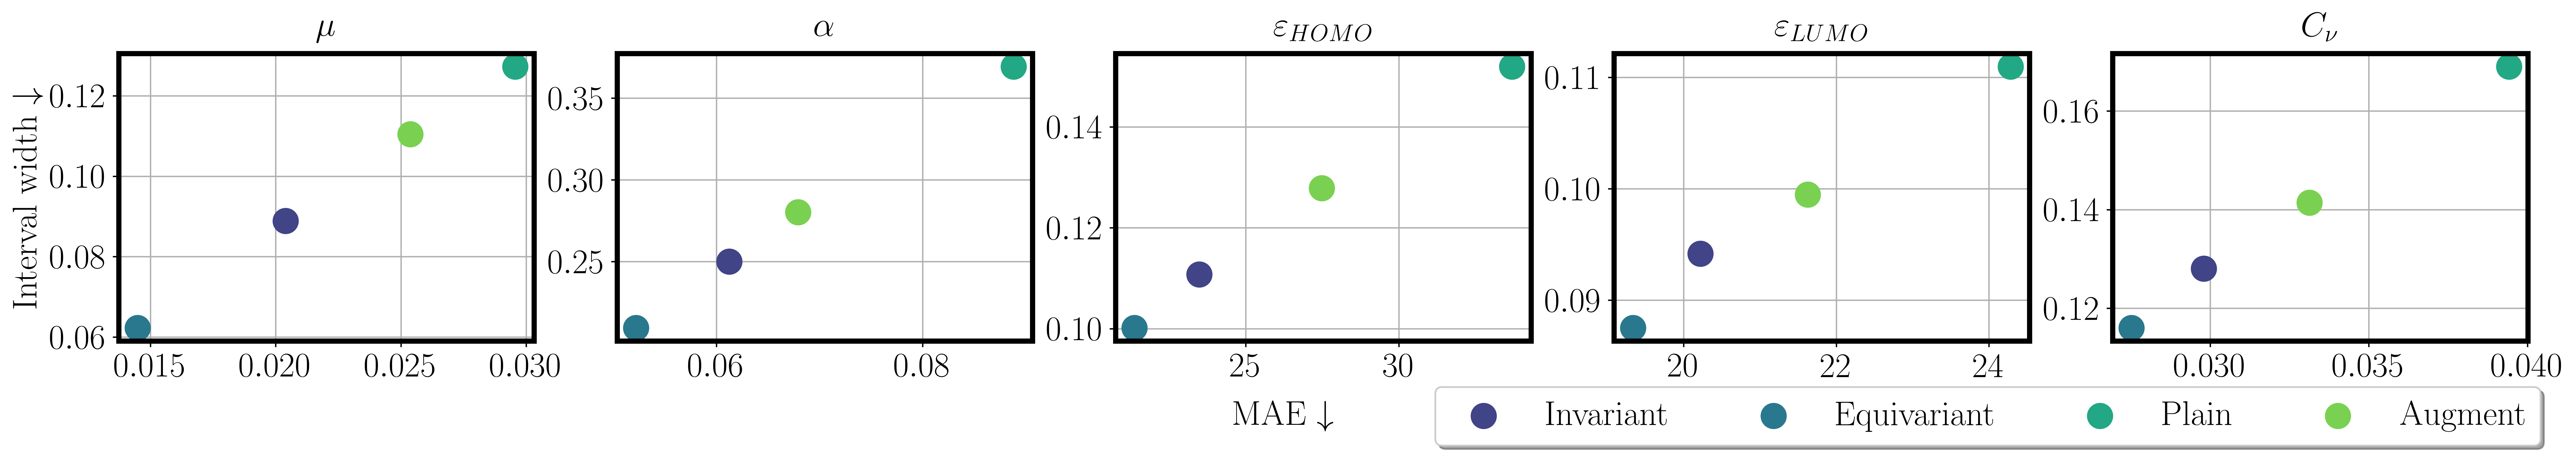

In [3]:

def plot_cp(models, targets, scatter_size=200, fontsize=20):

    fig, ax = plt.subplots(1, len(targets), figsize=(5*len(targets),3), dpi=600)

    for i, t in enumerate(targets):
        
        c = 0
        for model_name, model in models.items():
            metric, width = [model[t]["mae"]["mean"]], [model[t]["width_mean"]]
            ax[i].scatter(metric, width, c=colors[c], s=scatter_size, label=model_name)
            c += 1


        ax[i].grid()
        
        if i == 0:
            ax[i].set_ylabel(r"Interval width $\downarrow$", fontsize=fontsize)

        ax[i].set_axisbelow(True)        
        ax[i].set_title(f"{target2title[t]}", pad=10, fontsize=fontsize)
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(-0.3, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=4
    )

    plt.suptitle(r"MAE $\downarrow$", y=-0.05, fontsize=fontsize)
    
plot_cp(
    models={
        "Invariant": invariant,
        "Equivariant": equivariant,
        "Plain": plain,
        "Augment": augment
    },
    targets=["mu", "alpha", "homo", "lumo",  "Cv"]
)
